# Task :-2 

## Red_Wine_Quality_Analysis (CognoRise Infotech)

In [96]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')
#plt.style.use('seaborn-darkgrid')
sns.set_style("ticks")
import seaborn as sns
import os

In [97]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [93]:
df.shape

(1599, 12)

In [94]:
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

C:\Users\91789\AppData\Local\Temp\ipykernel_15640\3970780530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette = 'inferno')


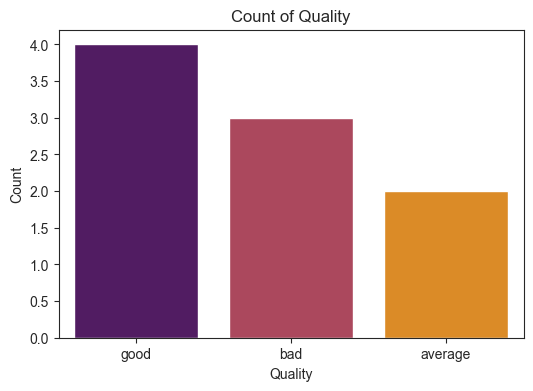

In [98]:

df = pd.DataFrame({'quality': ['good', 'bad', 'good', 'good', 'bad', 'average', 'good', 'average', 'bad']})  
plt.figure(figsize=(6,4))  
sns.countplot(x='quality', data=df, palette = 'inferno')  
plt.title('Count of Quality')  
plt.xlabel('Quality')  
plt.ylabel('Count')  
plt.show()

C:\Users\91789\AppData\Local\Temp\ipykernel_15640\257913068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'quality' , y = 'alcohol', data = df , palette = 'inferno')


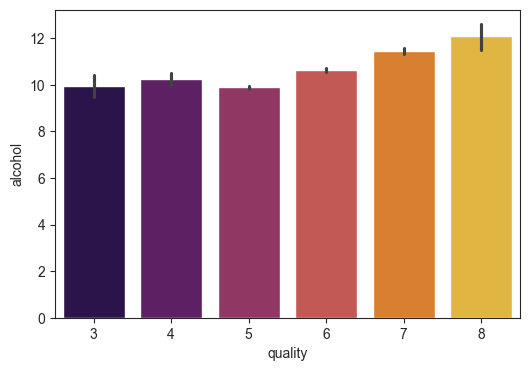

In [111]:
plt.figure(figsize =(6,4))
sns.barplot(x= 'quality' , y = 'alcohol', data = df , palette = 'inferno')
plt.show()

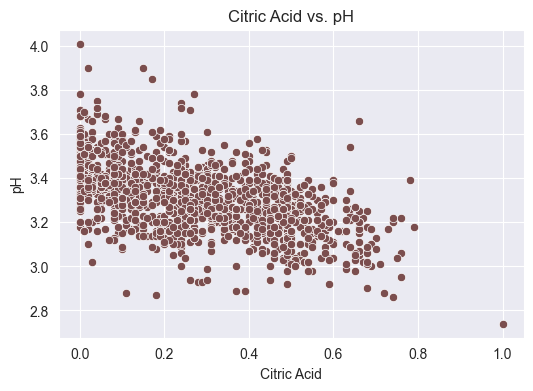

In [129]:
# Strip any unwanted spaces in column names  
df.columns = df.columns.str.strip()  

# Check the dataframe shape and first few rows  
#print(df.shape)  
#print(df.head())  

# Create the scatter plot for 'citric acid' vs 'pH'  
plt.figure(figsize=(6, 4))  
sns.scatterplot(x='citric acid', y='pH', data=df)  
plt.xlabel('Citric Acid')  
plt.ylabel('pH')  
plt.title('Citric Acid vs. pH')  
plt.show()

<Figure size 1000x800 with 0 Axes>

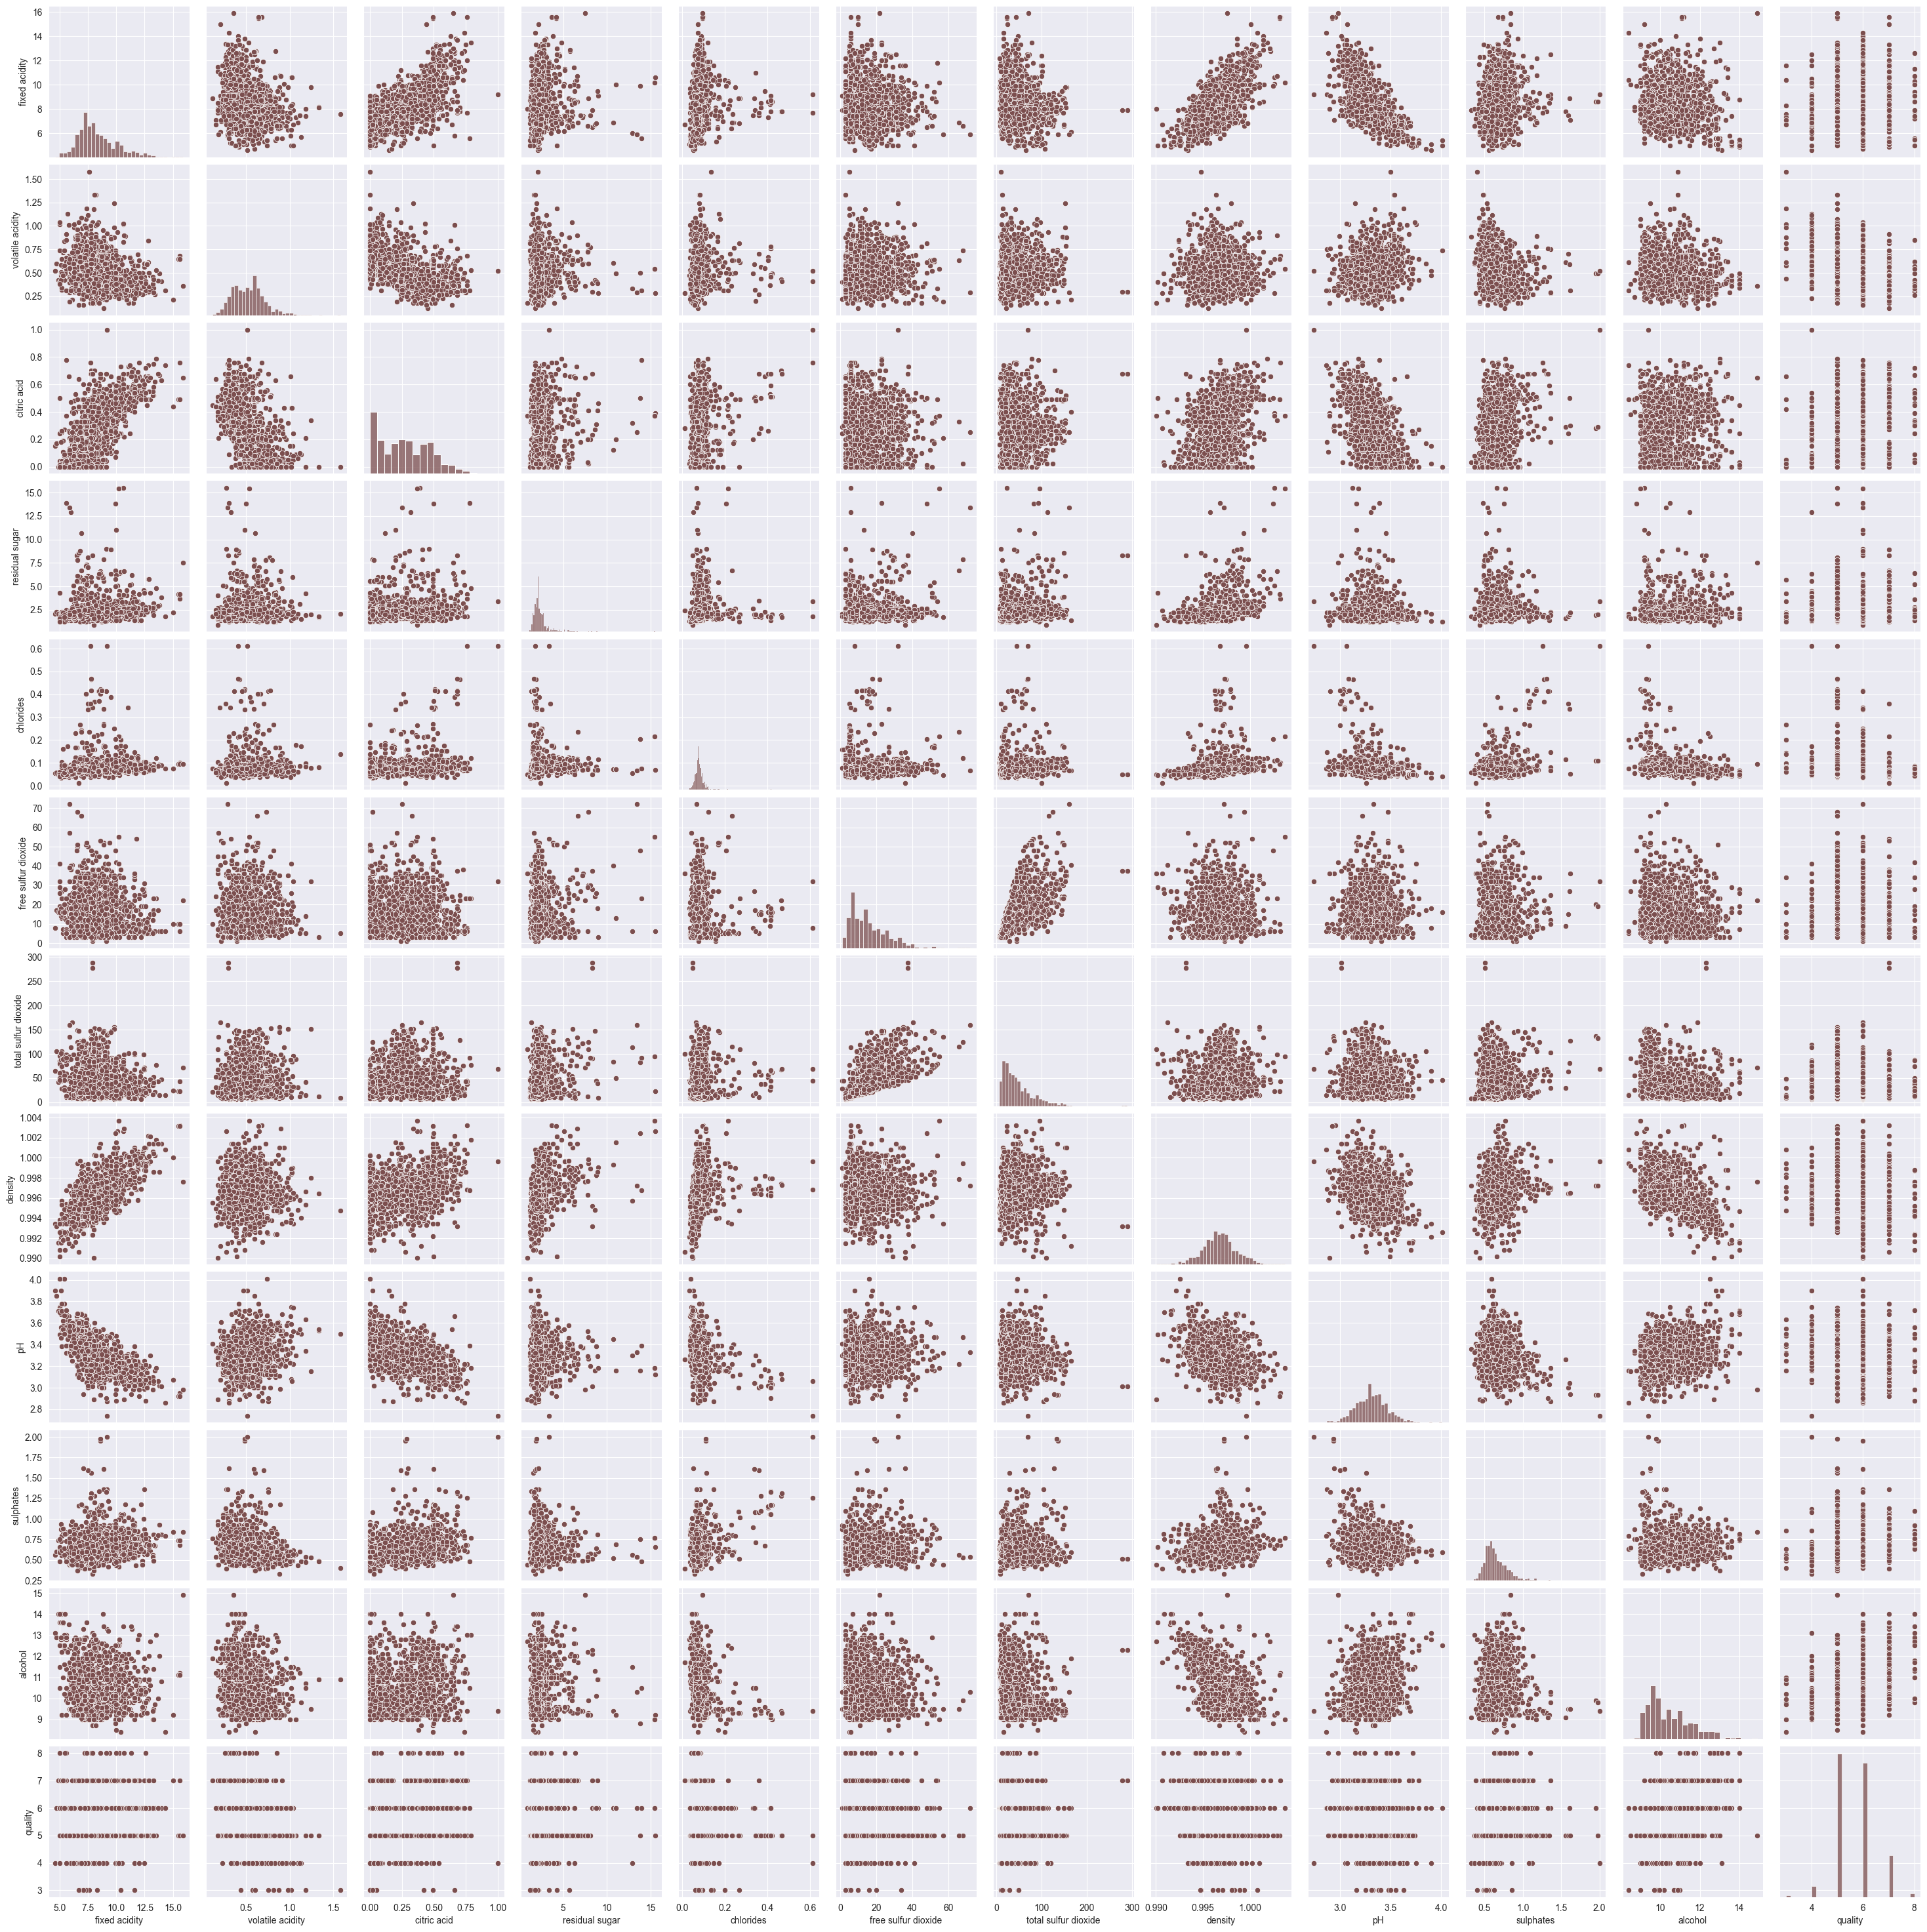

In [131]:
plt.figure(figsize =(10,8))
sns.pairplot(df)
plt.show()

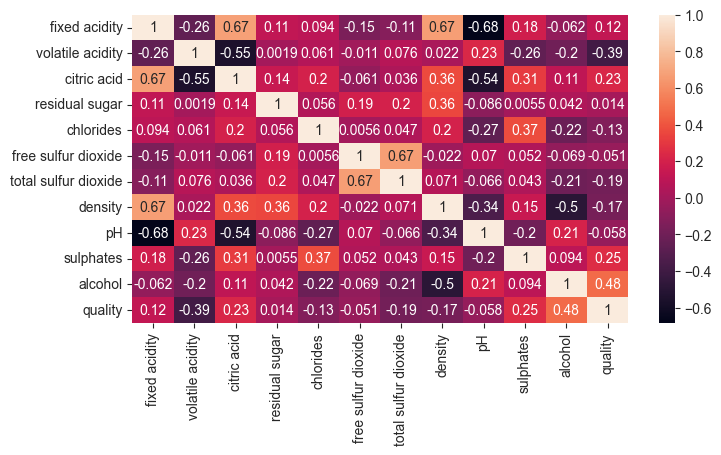

In [102]:
plt.figure(figsize =(8,4))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [103]:
x = df.drop(['quality'], axis =1)
y = df['quality']

 ## Data Preprocessing

In [104]:
from imblearn.over_sampling import SMOTE  

# Assuming x and y are your features and target variable, respectively.  
os = SMOTE()  
x_res, y_res = os.fit_resample(x, y)

In [105]:
#!pip install -U imbalanced-learn
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(x_res ,y_res,test_size =0.2 , random_state =0)


In [106]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std =stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [107]:
from sklearn.metrics import accuracy_score

## Logistic Regression 

In [108]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
predictions = lr.predict(x_test_std)
accuracy_score(y_test , predictions)

0.5757946210268948

## Decision Tree Classifier 

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
accuracy_score(y_test, dt.predict(x_test_std))

0.80440097799511

## Random Forest Classifier 

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state =42)
rf.fit(x_train_std, y_train)
accuracy_score(y_test, rf.predict(x_test_std))

0.8569682151589242